<a href="https://colab.research.google.com/github/vaswania/GeneticAlgo/blob/master/Heart_Failure_patient_stratification_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
#from tensorflow.contrib.tensor_forest.python import tensor_forest
from tensorflow.python.ops import resources

import argparse
import sys
import tempfile


import matplotlib.pyplot as plt

# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

FLAGS = None

In [ ]:
from google.colab import files
file = files.upload()
df = pd.read_csv("heart_esi_lip_ml_ds_9920_nohdr.csv", header=None)
print(df.shape)
df.describe()

Saving heart_esi_lip_ml_ds_9920_nohdr.csv to heart_esi_lip_ml_ds_9920_nohdr (1).csv
(90, 551)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,...,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,1.000000,11.854224,2.818435,3.555677,2.865485,4.653861,4.370022,4.205683,5.635090,4.216529,6.646493,2.908847,10.522688,6.899508,8.089654,5.132044,6.024191,6.635086,5.521203,3.682958,4.736706,6.210232,7.727541,8.064121,7.771935,6.599693,5.848375,3.402973,12.288285,7.875167,9.450315,8.118004,7.090129,4.384735,7.586649,6.996382,5.325465,9.594748,6.592071,5.941355,...,6.505049,7.521565,4.566174,5.487417,8.625468,5.930878,6.747554,8.963414,4.764010,3.896865,6.539462,4.191439,6.960051,5.290547,6.468052,4.038316,6.686661,6.454731,5.514994,3.378372,4.476490,5.896114,9.253117,7.558674,7.117108,6.048340,3.214883,7.443372,2.106096,3.991533,5.050241,4.287966,3.501601,5.743489,3.880936,4.929854,3.897040,4.420256,3.227835,6.197451
std,0.821071,0.157354,0.736520,0.762700,0.794960,0.264058,0.708831,0.729792,2.071043,1.970326,0.309065,2.063421,0.146896,0.227518,0.292466,1.269559,1.673378,0.748094,1.300012,1.512247,0.715422,0.539905,0.329859,0.703363,0.656318,1.308799,1.285861,1.612094,0.220881,0.433491,0.509999,0.447027,0.567150,1.217681,0.652695,0.665866,1.491625,0.452346,0.739216,0.845817,...,0.454922,0.375169,0.847251,0.344098,0.204093,0.221086,0.447705,0.219664,0.487255,0.612416,0.259717,0.959063,0.249494,0.880510,0.130246,0.553728,0.338856,0.214957,0.469572,0.447606,0.439612,0.368816,0.327600,0.209914,0.299282,0.306707,1.327147,0.157978,1.255647,0.772981,0.630834,0.442845,0.222065,0.717120,0.499094,0.390350,0.609429,0.433024,0.716311,0.358418
min,0.000000,11.520253,0.671752,0.652205,0.000000,3.813571,1.601648,0.000000,1.007440,0.000000,5.768794,0.000000,10.044277,5.967031,7.379911,0.000000,0.000000,5.096378,0.000000,0.000000,2.218178,4.928238,6.599618,7.017815,6.590495,2.931450,0.000000,0.000000,11.598239,7.061229,8.505789,6.872976,4.813897,0.000000,5.894469,3.848991,0.000000,7.686962,4.624173,2.803218,...,5.590742,6.061048,0.000000,4.162133,8.186941,5.433354,5.781926,8.284290,3.320913,1.592851,5.900119,0.000000,5.981646,0.000000,6.176776,1.613321,5.565110,5.885333,4.454240,1.833022,3.243994,4.989354,8.404500,7.120839,6.314220,5.227245,0.000000,7.072824,0.000000,2.537560,2.316597,2.980292,2.680993,0.000000,2.354143,3.959573,1.596954,3.309228,0.000000,5.245279
25%,0.000000,11.755177,2.459252,3.404311,2.654912,4.482478,4.106305,4.078640,3.778408,3.738252,6.465639,1.426562,10.444331,6.798898,7.909629,4.594257,5.995986,6.056287,5.251297,2.985140,4.369033,5.857329,7.558005,7.668066,7.292421,5.818845,5.414864,2.671339,12.154839,7.690104,9.145592,7.906318,6.941531,3.813163,7.216152,6.845492,4.949605,9.510275,6.250664,5.549539,...,6.176631,7.315497,4.277656,5.253473,8.484326,5.768234,6.367137,8.837645,4.396213,3.598342,6.366644,4.148649,6.828176,4.995508,6.382355,3.784513,6.486875,6.307591,5.193882,3.157688,4.236859,5.600521,8.986192,7.426279,6.930876,5.813433,2.150748,7.343619,1.258933,3.466625,4.798791,4.057932,3.363138,5.627847,3.502992,4.652973,3.550337,4.086788,2.830916,5.

In [ ]:
target_column = [0] 
predictors = list(set(list(df.columns))-set(target_column))
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,...,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,1.000000,11.854224,2.818435,3.555677,2.865485,4.653861,4.370022,4.205683,5.635090,4.216529,6.646493,2.908847,10.522688,6.899508,8.089654,5.132044,6.024191,6.635086,5.521203,3.682958,4.736706,6.210232,7.727541,8.064121,7.771935,6.599693,5.848375,3.402973,12.288285,7.875167,9.450315,8.118004,7.090129,4.384735,7.586649,6.996382,5.325465,9.594748,6.592071,5.941355,...,6.505049,7.521565,4.566174,5.487417,8.625468,5.930878,6.747554,8.963414,4.764010,3.896865,6.539462,4.191439,6.960051,5.290547,6.468052,4.038316,6.686661,6.454731,5.514994,3.378372,4.476490,5.896114,9.253117,7.558674,7.117108,6.048340,3.214883,7.443372,2.106096,3.991533,5.050241,4.287966,3.501601,5.743489,3.880936,4.929854,3.897040,4.420256,3.227835,6.197451
std,0.821071,0.157354,0.736520,0.762700,0.794960,0.264058,0.708831,0.729792,2.071043,1.970326,0.309065,2.063421,0.146896,0.227518,0.292466,1.269559,1.673378,0.748094,1.300012,1.512247,0.715422,0.539905,0.329859,0.703363,0.656318,1.308799,1.285861,1.612094,0.220881,0.433491,0.509999,0.447027,0.567150,1.217681,0.652695,0.665866,1.491625,0.452346,0.739216,0.845817,...,0.454922,0.375169,0.847251,0.344098,0.204093,0.221086,0.447705,0.219664,0.487255,0.612416,0.259717,0.959063,0.249494,0.880510,0.130246,0.553728,0.338856,0.214957,0.469572,0.447606,0.439612,0.368816,0.327600,0.209914,0.299282,0.306707,1.327147,0.157978,1.255647,0.772981,0.630834,0.442845,0.222065,0.717120,0.499094,0.390350,0.609429,0.433024,0.716311,0.358418
min,0.000000,11.520253,0.671752,0.652205,0.000000,3.813571,1.601648,0.000000,1.007440,0.000000,5.768794,0.000000,10.044277,5.967031,7.379911,0.000000,0.000000,5.096378,0.000000,0.000000,2.218178,4.928238,6.599618,7.017815,6.590495,2.931450,0.000000,0.000000,11.598239,7.061229,8.505789,6.872976,4.813897,0.000000,5.894469,3.848991,0.000000,7.686962,4.624173,2.803218,...,5.590742,6.061048,0.000000,4.162133,8.186941,5.433354,5.781926,8.284290,3.320913,1.592851,5.900119,0.000000,5.981646,0.000000,6.176776,1.613321,5.565110,5.885333,4.454240,1.833022,3.243994,4.989354,8.404500,7.120839,6.314220,5.227245,0.000000,7.072824,0.000000,2.537560,2.316597,2.980292,2.680993,0.000000,2.354143,3.959573,1.596954,3.309228,0.000000,5.245279
25%,0.000000,11.755177,2.459252,3.404311,2.654912,4.482478,4.106305,4.078640,3.778408,3.738252,6.465639,1.426562,10.444331,6.798898,7.909629,4.594257,5.995986,6.056287,5.251297,2.985140,4.369033,5.857329,7.558005,7.668066,7.292421,5.818845,5.414864,2.671339,12.154839,7.690104,9.145592,7.906318,6.941531,3.813163,7.216152,6.845492,4.949605,9.510275,6.250664,5.549539,...,6.176631,7.315497,4.277656,5.253473,8.484326,5.768234,6.367137,8.837645,4.396213,3.598342,6.366644,4.148649,6.828176,4.995508,6.382355,3.784513,6.486875,6.307591,5.193882,3.157688,4.236859,5.600521,8.986192,7.426279,6.930876,5.813433,2.150748,7.343619,1.258933,3.466625,4.798791,4.057932,3.363138,5.627847,3.502992,4.652973,3.550337,4.086788,2.830916,5.

In [ ]:
X = df[predictors].values
y = df[target_column].values

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
#X_up = X[1:,]
#y_up = y[1:,]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=23)
split = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=23)
for train_index, test_index in split.split(df, df[target_column]):
  strat_train_set = df.loc[train_index]
  X_train = strat_train_set[predictors]
  y_train = strat_train_set[target_column]
  strat_test_set = df.loc[test_index]
  X_test = strat_test_set[predictors]
  y_test = strat_test_set[target_column]
  
print(X_train.shape); print(X_test.shape)

(60, 550)
(30, 550)


In [ ]:
y_train_arr = y_train.values
y_pls_rav = y_train_arr.ravel()

In [ ]:
rf = RandomForestClassifier(random_state=21)
#model.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
import pandas as pd
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=23, n_jobs = -1)

In [ ]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   49.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.6min finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
#from matplotlib import pyplot as plt
rf_random.best_params_
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=118,
                       n_jobs=None, oob_score=False, random_state=21, verbose=0,
                       warm_start=False)

In [ ]:

#predictions = rf_random.predict_proba(X_test)
auc_scr = roc_auc_score(y_test, predictions, multi_class='ovr')
print(auc_scr)

0.995


In [ ]:
def plot_results(model, param = 'n_estimators', name = 'Num Trees'):
    param_name = 'param_%s' % param

    # Extract information from the cross validation model
    #train_scores = model.cv_results_['mean_train_score']
    test_scores = model.cv_results_['mean_test_score']
    train_time = model.cv_results_['mean_fit_time']
    param_values = list(model.cv_results_[param_name])
    
    # Plot the scores over the parameter
    plt.subplots(1, 2, figsize=(10, 6))
    plt.subplot(121)
    #plt.plot(param_values, train_scores, 'bo-', label = 'train')
    plt.plot(param_values, test_scores, 'go-', label = 'test')
    plt.ylim(ymin = 0, ymax = 1)
    plt.legend()
    plt.xlabel(name)
    plt.ylabel('Mean Absolute Error')
    plt.title('Score vs %s' % name)
    
    plt.subplot(122)
    plt.plot(param_values, train_time, 'ro-')
    plt.ylim(ymin = 0.0, ymax = 2.0)
    plt.xlabel(name)
    plt.ylabel('Train Time (sec)')
    plt.title('Training Time vs %s' % name)
    
    
    plt.tight_layout(pad = 4)
    #plt.savefig('ESIposneg_heart_rf__paraopt_cv3_913.svg')
    #files.download('ESIposneg_heart_rf__paraopt_cv3_913.svg')


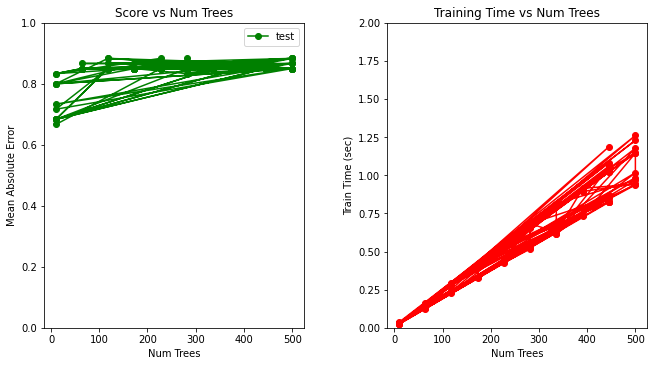

In [ ]:
fig2 = plot_results(rf_random)

In [ ]:
result = permutation_importance(rf_random, X_test, y_test, n_repeats=3,
                                random_state=23, n_jobs=-1)

NameError: ignored

In [ ]:
y_pred = rf_random.predict(X_test)

In [ ]:
y_rav = y.ravel()

In [ ]:
 cvres = rf_random.cv_results_

In [ ]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(mean_score, params)


0.7999999999999999 {'n_estimators': 64, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': True}
0.8999999999999999 {'n_estimators': 64, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None, 'bootstrap': False}
0.8666666666666666 {'n_estimators': 336, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': True}
0.85 {'n_estimators': 118, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 80, 'bootstrap': False}
0.8666666666666666 {'n_estimators': 391, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}
0.8833333333333334 {'n_estimators': 227, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': True}
0.8666666666666666 {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_d

In [ ]:
feature_importances = rf_random.best_estimator_.feature_importances_

In [ ]:
feature_importances

array([0.00408246, 0.        , 0.        , 0.        , 0.        ,
       0.00220993, 0.00069555, 0.02653232, 0.00144928, 0.        ,
       0.00262039, 0.00042955, 0.0016572 , 0.        , 0.        ,
       0.00035371, 0.        , 0.00043642, 0.        , 0.00282765,
       0.        , 0.00082938, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00930416, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00288066, 0.        , 0.        , 0.        , 0.000339  ,
       0.00098903, 0.        , 0.00452015, 0.        , 0.00037772,
       0.        , 0.        , 0.00193611, 0.        , 0.00608974,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00098736, 0.        , 0.00043197, 0.00464614,
       0.        , 0.00074884, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00129851, 0.        ,
       0.        , 0.        , 0.        , 0.00817059, 0.00623

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = rf_random.best_estimator_.predict(X_test)
final_mse = mean_squared_error(y_test, y_pred)
final_rmse = np.sqrt(final_mse)

In [ ]:
print(final_mse, final_rmse)

0.4 0.6324555320336759


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

=== Confusion Matrix ===
[[ 9  0  1]
 [ 0 10  0]
 [ 0  0 10]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       1.00      1.00      1.00        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



[[ 9  0  1]
 [ 0 10  0]
 [ 0  0 10]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

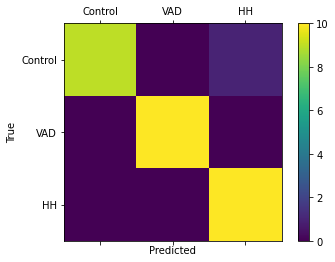

In [ ]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')
labels = [0, 1, 2]
cm = confusion_matrix(y_test, y_pred, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
#plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
labels2 = ['Control', 'VAD', 'HH']
ax.set_xticklabels([''] + labels2)
ax.set_yticklabels([''] + labels2)
plt.xlabel('Predicted')
plt.ylabel('True')
fig.savefig('ESIpos_heart_rf_cv3_420.svg')
files.download('ESIpos_heart_rf_cv3_420.svg')


In [ ]:
y_train_rav = y_train.ravel()
cross_val_score(forest_clf, X_train, y_train_rav, cv=3, scoring="accuracy")

array([1.        , 0.85714286, 0.95238095])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

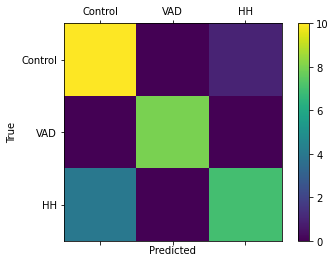

In [ ]:
from sklearn.metrics import confusion_matrix
from google.colab import files
plsdacm = ([[10, 0, 1],
            [0, 8, 0],
            [4, 0, 7]])
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(plsdacm)
#plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
labels2 = ['Control', 'VAD', 'HH']
ax.set_xticklabels([''] + labels2)
ax.set_yticklabels([''] + labels2)
plt.xlabel('Predicted')
plt.ylabel('True')
fig.savefig('ESIposnegiso_heart_plsda91820.svg')
files.download('ESIposnegiso_heart_plsda91820.svg')


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# number of features at every split
max_features = [‘auto’, ‘sqrt’]

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)
# create random grid
random_grid = {
 ‘n_estimators’: n_estimators,
 ‘max_features’: max_features,
 ‘max_depth’: max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rfc_random.fit(X_train, y_train)
# print results
print(rfc_random.best_params_)

In [ ]:
rfc_predict = rfc_random.predict(X_test)
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, rfc_predict))

In [ ]:
rf_random.feature_importances_

array([0.00480509, 0.00165834, 0.00016216, 0.00036486, 0.0007471 ,
       0.00360716, 0.00112663, 0.03893588, 0.00185977, 0.00012162,
       0.00081653, 0.0066678 , 0.01717987, 0.00130665, 0.00065154,
       0.        , 0.        , 0.00148921, 0.00057678, 0.00042678,
       0.        , 0.00749867, 0.        , 0.00010811, 0.00087452,
       0.00267556, 0.00303698, 0.00012162, 0.00178271, 0.0009805 ,
       0.00400168, 0.00114865, 0.        , 0.0031216 , 0.00069989,
       0.00841443, 0.00898906, 0.00222649, 0.01896066, 0.00313611,
       0.00072037, 0.00153635, 0.00250483, 0.00079802, 0.00181138,
       0.00093143, 0.00041699, 0.00618563, 0.00193339, 0.00028378,
       0.        , 0.00018243, 0.00184518, 0.00052076, 0.02561837,
       0.00190731, 0.0035961 , 0.00314817, 0.00053243, 0.00061002,
       0.00125726, 0.00334548, 0.        , 0.00037768, 0.00036486,
       0.00151872, 0.00651983, 0.00058784, 0.0006398 , 0.00076137,
       0.00081118, 0.00187098, 0.00933508, 0.00252284, 0.02164